In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def test_model_score(  y_test , y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print('Accuracy: ', accuracy)
    print('Precision: ', precision)
    print('Recall: ', recall)
    print('F1 Score: ', f1)

In [3]:
# Read the data from the CSV file
data = pd.read_csv("Patient_no_show_selected_features.csv")

In [4]:
# get the data type of each column
data.dtypes



Gender           object
Age               int64
WaitingTime     float64
Scholarship       int64
Hipertension      int64
Diabetes          int64
Alcoholism        int64
Handcap           int64
SMS_received      int64
No-show          object
dtype: object

In [5]:
# Assign 0 for females and 1 for males
data['Gender'] = data['Gender'].apply(lambda x: 0 if x == 'F' else 1)

# Assign 0 for No-show and 1 for Show-up
data['No-show'] = data['No-show'].apply(lambda x: 0 if x == 'No' else 1)




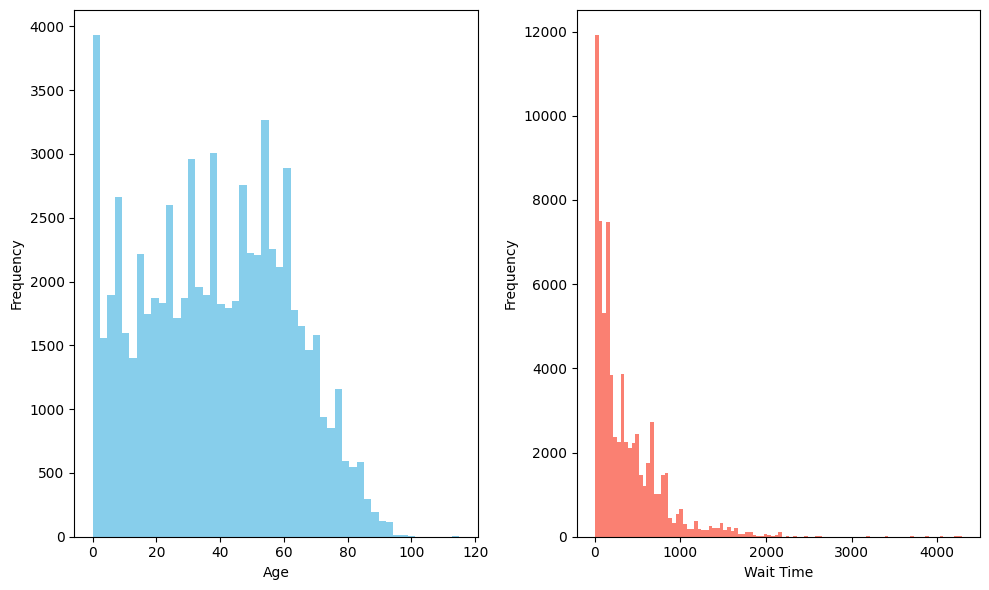

In [6]:
# Plot the data distribution of age and wait time
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.hist(data["Age"], bins=50, color="skyblue")
plt.xlabel("Age")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
plt.hist(data["WaitingTime"], bins=100, color="salmon")
plt.xlabel("Wait Time")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [7]:
# give a statistical summary of the data
print(data.describe())



             Gender           Age   WaitingTime   Scholarship  Hipertension  \
count  71837.000000  71837.000000  71837.000000  71837.000000  71837.000000   
mean       0.331807     38.486504    363.912976      0.092766      0.208486   
std        0.470865     22.916152    395.830746      0.290106      0.406229   
min        0.000000      0.000000      3.272222      0.000000      0.000000   
25%        0.000000     19.000000     87.251389      0.000000      0.000000   
50%        0.000000     39.000000    208.439167      0.000000      0.000000   
75%        1.000000     57.000000    519.079722      0.000000      0.000000   
max        1.000000    115.000000   4285.316944      1.000000      1.000000   

           Diabetes    Alcoholism       Handcap  SMS_received       No-show  
count  71837.000000  71837.000000  71837.000000  71837.000000  71837.000000  
mean       0.074446      0.025266      0.016496      0.493269      0.285159  
std        0.262498      0.156932      0.127373      0

In [8]:
print(data["Gender"].value_counts())
print(data["No-show"].value_counts())
print(data["SMS_received"].value_counts())
print(data["Handcap"].value_counts())
print(data["Scholarship"].value_counts())
print(data["Hipertension"].value_counts())
print(data["Diabetes"].value_counts())
print(data["Alcoholism"].value_counts())


Gender
0    48001
1    23836
Name: count, dtype: int64
No-show
0    51352
1    20485
Name: count, dtype: int64
SMS_received
0    36402
1    35435
Name: count, dtype: int64
Handcap
0    70652
1     1185
Name: count, dtype: int64
Scholarship
0    65173
1     6664
Name: count, dtype: int64
Hipertension
0    56860
1    14977
Name: count, dtype: int64
Diabetes
0    66489
1     5348
Name: count, dtype: int64
Alcoholism
0    70022
1     1815
Name: count, dtype: int64


In [9]:
# seperate the outliers from the data for each collumn bybconsidering IQR
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Gender            1.000000
Age              38.000000
WaitingTime     431.828333
Scholarship       0.000000
Hipertension      0.000000
Diabetes          0.000000
Alcoholism        0.000000
Handcap           0.000000
SMS_received      1.000000
No-show           1.000000
dtype: float64


In [10]:
filtered_data= data[(data["Age"] < (Q3["Age"] + 1.5 * IQR["Age"])) & (data["Age"] > (Q1["Age"] - 1.5 * IQR["Age"])) & 
           (data["WaitingTime"] < (Q3["WaitingTime"] + 1.5 * IQR["WaitingTime"])) & (data["WaitingTime"] > (Q1["WaitingTime"] - 1.5 * IQR["WaitingTime"]))]
filtered_data.shape

(68482, 10)

In [11]:
filtered_data.describe()

,Gender,Age,WaitingTime,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
count,68482.000000,68482.000000,68482.000000,68482.000000,68482.000000,68482.000000,68482.000000,68482.000000,68482.000000,68482.000000
mean,0.332847,38.113577,303.122647,0.095120,0.208537,0.074691,0.026007,0.016486,0.485923,0.284381
std,0.471236,22.801496,273.986369,0.293383,0.406265,0.262894,0.159157,0.127336,0.499805,0.451123
min,0.000000,0.000000,3.272222,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,19.000000,84.955278,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,38.000000,184.619722,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,56.000000,488.459097,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,102.000000,1166.802222,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


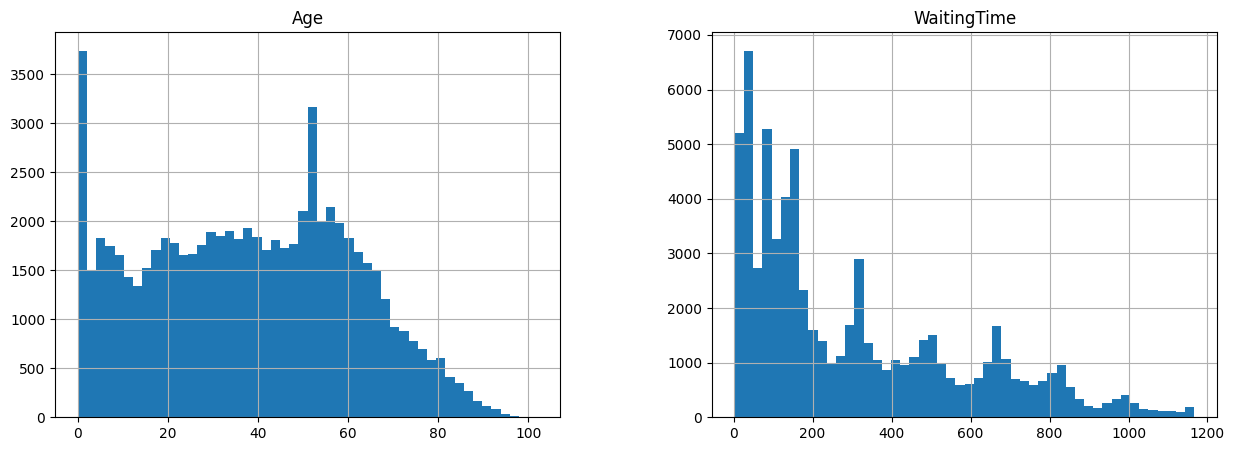

In [12]:
filtered_data[["Age","WaitingTime"]].hist(figsize=(15, 5) , bins=50)
plt.show()

In [13]:
# get the outliers
outliers = data[~data.index.isin(filtered_data.index)]
outliers.shape


(3355, 10)

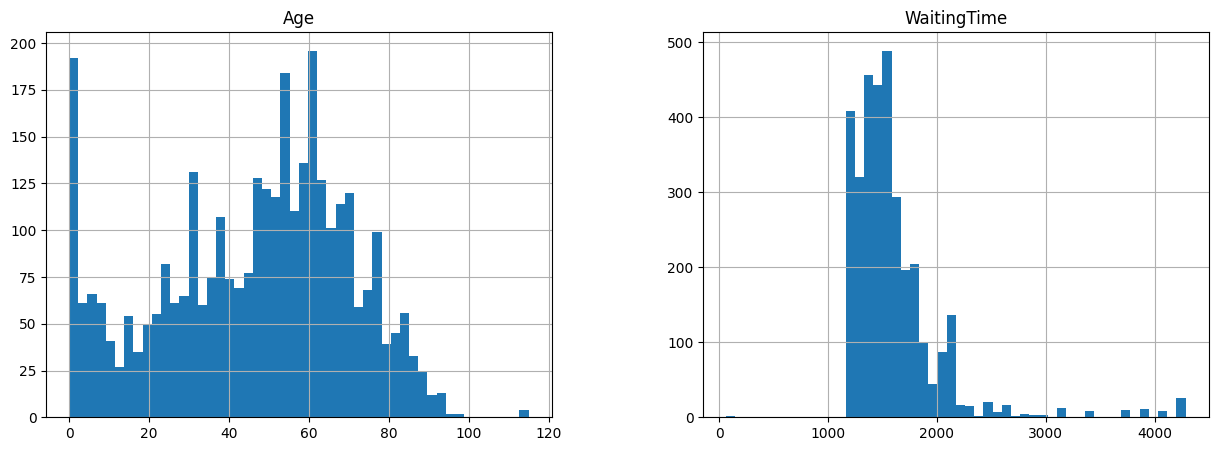

In [14]:
# plot the outliers
outliers[["Age","WaitingTime"]].hist(figsize=(15, 5) , bins=50)
plt.show()

In [15]:
# save the filtered data to a new CSV file
filtered_data.to_csv("Patient_no_show_filtered_data.csv", index=False)

# save the outliers to a new CSV file
outliers.to_csv("Patient_no_show_outliers.csv", index=False)

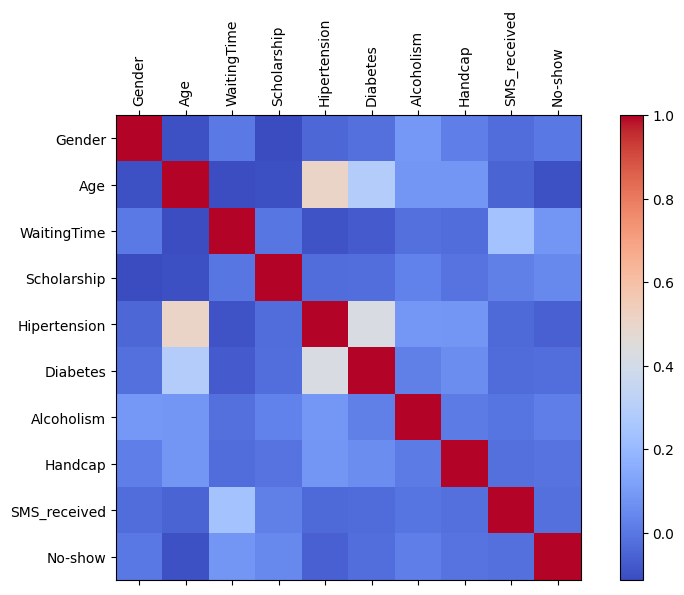

In [16]:
# plot the correlation matrix
corr = filtered_data.corr()
plt.figure(figsize=(10, 6))
plt.matshow(corr, cmap='coolwarm', fignum=1)
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

